In [1]:
from sklearn.model_selection import train_test_split

from pstree.cluster_gp_sklearn import PSTreeRegressor, GPRegressor
from pstree.datasets.data_loader import *
from pstree.datasets.synthetic_datasets import load_synthetic1
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import r2_score, root_mean_squared_error as rmse

from matplotlib import pyplot as plt

SyntaxError: invalid syntax (cluster_gp_sklearn.py, line 431)

gen	time    	rmse 	r2   	nodes	pop_nodes	te_rmse	te_r2
0  	0.247345	23.65	-3.85	258  	22       	23.35  	-3.92
1  	0.532808	9.97 	0.14 	607  	40       	10.15  	0.07 
2  	0.801378	7.91 	0.46 	759  	46       	8.59   	0.33 
3  	1.13173 	11.48	-0.14	747  	48       	11.05  	-0.1 
4  	1.37933 	9.05 	0.29 	811  	52       	8.98   	0.27 
5  	1.57932 	7.65 	0.49 	691  	44       	7.77   	0.46 
6  	1.8151  	7.11 	0.56 	661  	48       	6.93   	0.57 
7  	2.07864 	8.54 	0.37 	653  	56       	8.47   	0.35 
8  	2.58337 	8.34 	0.4  	747  	72       	8.31   	0.38 
9  	2.82072 	8.71 	0.34 	781  	66       	8.42   	0.36 
10 	3.06307 	8.25 	0.41 	807  	66       	8.38   	0.37 
11 	3.3735  	7.5  	0.51 	895  	82       	7.78   	0.45 
12 	3.67104 	7.4  	0.53 	977  	80       	7.25   	0.53 
13 	3.90157 	8.5  	0.37 	883  	82       	8.36   	0.37 
14 	4.48154 	8.26 	0.41 	941  	78       	8.5    	0.35 
15 	5.32801 	8.38 	0.39 	943  	94       	8.13   	0.4  
16 	5.69927 	7.77 	0.48 	1167 	108      	7.83   	0.45 
17 	5.9955

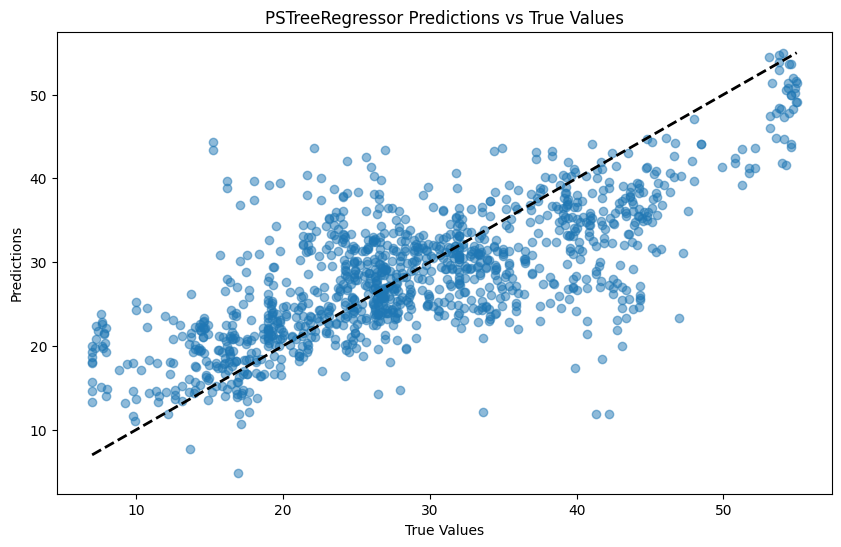

In [21]:
from sklearn.model_selection import train_test_split

from pstree.cluster_gp_sklearn import PSTreeRegressor, GPRegressor
from pstree.datasets.data_loader import *
from pstree.datasets.synthetic_datasets import load_synthetic1
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import r2_score, root_mean_squared_error as rmse

from matplotlib import pyplot as plt

X,y = load_istanbul()
X,y = load_parkinson_updrs()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

r = PSTreeRegressor(regr_class=GPRegressor, 
                    tree_class=DecisionTreeRegressor,
                    height_limit=6, 
                    n_pop=10,  # 25
                    n_gen=20,  # 50 
                    basic_primitive=True,
                    size_objective=True,
                    max_leaf_nodes=8,
                    constant_range=2,  # 2 
                    random_seed=0, 
                    random_state=0,
                    normalize=False,
                    verbose=True,
                    soft_tree=False,
                    afp=False,
                    X_test=X_test,
                    y_test=y_test,
                    validation_selection=False,
)

r.fit(X_train, y_train)
print('R2: ', r2_score(y_test, r.predict(X_test)))
print('RMSE: ', rmse(y_test, r.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, r.predict(X_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('PSTreeRegressor Predictions vs True Values')
plt.show()